
# Denoising a picture

In this example, we denoise a noisy version of a picture using the total
variation, bilateral, and wavelet denoising filters.

Total variation and bilateral algorithms typically produce "posterized" images
with flat domains separated by sharp edges. It is possible to change the degree
of posterization by controlling the tradeoff between denoising and faithfulness
to the original image.

## Total variation filter

The result of this filter is an image that has a minimal total variation norm,
while being as close to the initial image as possible. The total variation is
the L1 norm of the gradient of the image.

## Bilateral filter

A bilateral filter is an edge-preserving and noise reducing filter. It averages
pixels based on their spatial closeness and radiometric similarity.

## Wavelet denoising filter

A wavelet denoising filter relies on the wavelet representation of the image.
The noise is represented by small values in the wavelet domain which are set to
0.

In color images, wavelet denoising is typically done in the `YCbCr color
space`_ as denoising in separate color channels may lead to more apparent
noise.



Estimated Gaussian noise standard deviation = 0.03198468562785488


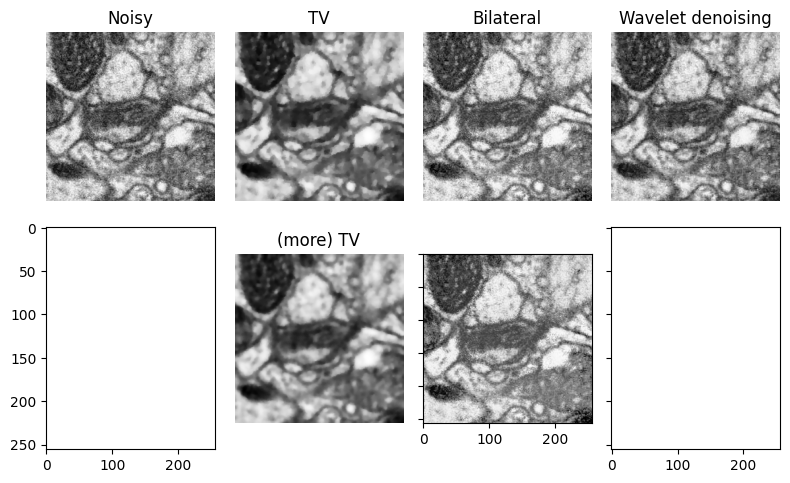

In [4]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float, io
from skimage.util import random_noise
import numpy as np


# original = img_as_float(data.chelsea()[100:250, 50:300])

path = "/home/jakobtroidl/Desktop/NVP/data/hemibrain-small/train/17136_20934_16795.png"
im = io.imread(path)
original = np.expand_dims(img_as_float(im), axis=-1)

sigma = 0.155
noisy = original # random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, channel_axis=-1, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, channel_axis=-1), cmap="gray")
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                channel_axis=-1))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, channel_axis=-1, rescale_sigma=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, channel_axis=-1))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                channel_axis=-1))
# ax[1, 2].axis('off')
# ax[1, 2].set_title('(more) Bilateral')
# ax[1, 3].imshow(denoise_wavelet(noisy, channel_axis=-1, convert2ycbcr=True,
#                                 rescale_sigma=True))
# ax[1, 3].axis('off')
# ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
# ax[1, 0].imshow(original)
# ax[1, 0].axis('off')
# ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()